In [ ]:
import kagglehub
cars_image_dataset_path = kagglehub.dataset_download('kshitij192/cars-image-dataset')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

/kaggle/input


## Importing the required libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

## Importing data into tensorflow dataset object

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

In [ ]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

# Question 1 :                                                            

Design a Convolutional Neural Network (CNN) architecture for image classification.Write your Code here

In [ ]:
model.summary()

#Q2 Compile Your model using appropriate metrics and loss

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

In [ ]:
scores = model.evaluate(test_generator)

In [ ]:
scores

## Plotting the accuracy and loss curves

In [ ]:
history.history.keys()

In [ ]:
type(history.history['loss'])

In [ ]:
len(history.history['loss'])

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

**Plot your Training Accuracy and Validation Accuracy using matplotlib**

## Testing the prediction on sample of image from test dataset

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


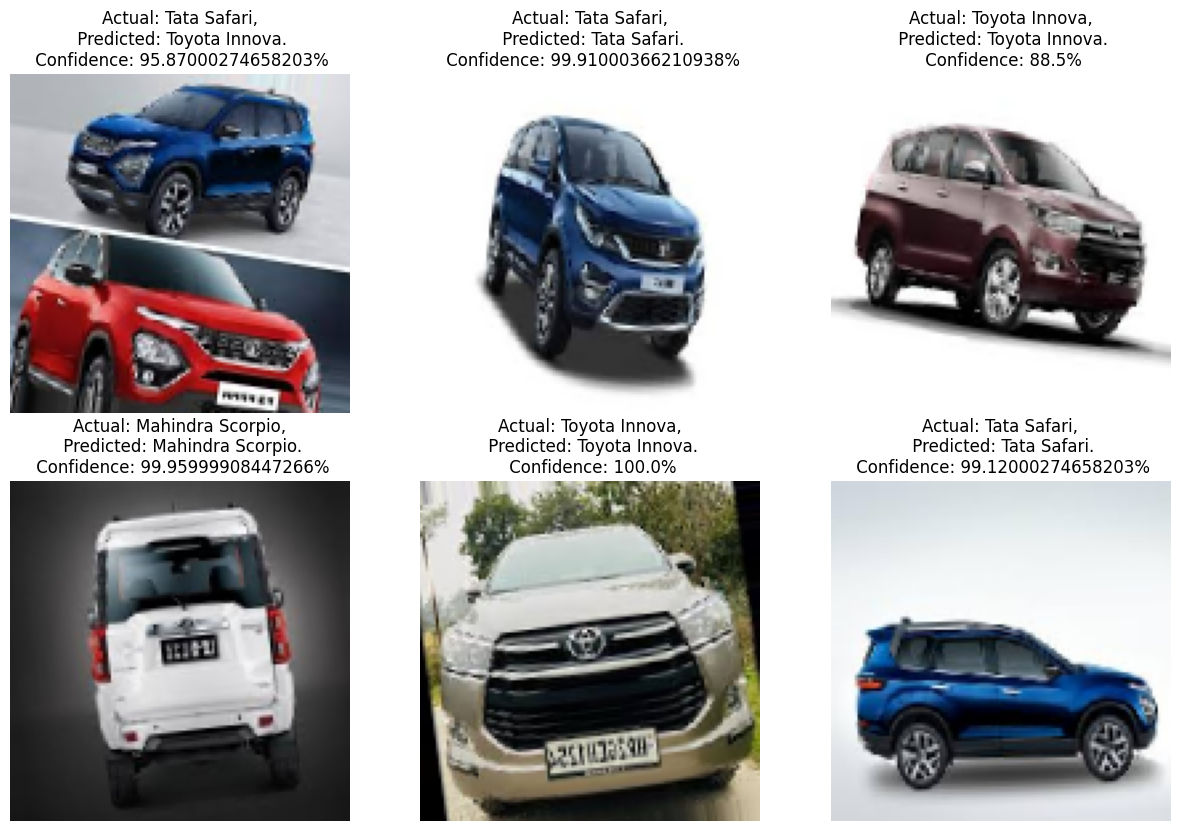

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

# Question 2:
Import the CIFAR-10 dataset and design a Convolutional Neural Network (CNN) for image classification. Your network should include convolutional and pooling layers, followed by fully connected layers, and use a softmax output layer to classify the 10 categories.

# Q: Bonus Question

Visualise the feature maps from each CNN Layer